**Read the dataset**

In [1]:
import pandas as pd
import nltk

In [5]:
df=pd.read_csv("spam.csv",encoding="latin-1")  #some times we have to decode the csv file for that we use encoding

In [6]:
df.head(5)  #show 5 rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape  #size of data set

(5572, 5)

In [8]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)  #in  here inplace=True mean if the drop column remove from the original one

In [9]:
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)   #rename v1,v2 column as class and sms
df.sample(5)

,class,sms
1618,ham,The 2 oz guy is being kinda flaky but one frie...
2608,ham,Hello madam how are you ?
2880,ham,Printer is cool. I mean groovy. Wine is groovying
2122,ham,Do you know when the result.
3400,ham,Thanks honey. Have a great day.


In [10]:
df.groupby('class').describe()    #group accroding to the class with duplicates

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [11]:
df=df.drop_duplicates(keep='first')   #remove duplicate values,stay first occurences only

In [12]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516                         Rofl. Its true to its name    1
spam    653    653  This is the 2nd time we have tried 2 contact u...    1

**Data visualisation**

In [13]:
df["Length"]=df["sms"].apply(len)    #create a new column Length by calculating the length of sms using len() function

In [14]:
df.head(2)    #describe

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

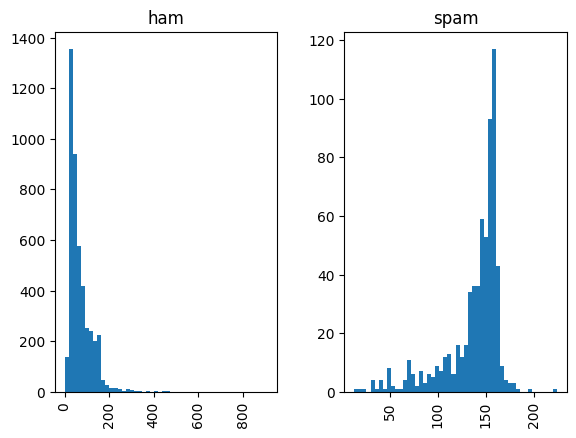

In [15]:
df.hist(column='Length',by='class',bins=50)

**Preprocessing**

In [16]:
from nltk.stem.porter import PorterStemmer    #reduces words to their root form (e.g., running → run).

nltk.download('stopwords')    #loads a list of common words like the, is, and, which are usually removed in text preprocessing.
from nltk.corpus import stopwords

nltk.download('punkt')   #loads a tokenizer to split text into words/sentences.
nltk.download('punkt_tab')   # required in some new NLTK versions
ps=PorterStemmer()   #  creates a stemmer object that you can use to stem words.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [17]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import string
def clean_text(text):
  text=text.lower()  #Converts all characters to lowercase → ensures uniformity (Hello = hello).
  text=nltk.word_tokenize(text)  #Splits the text into individual words/tokens using NLTK’s tokenizer.

#Creates a list y that only keeps alphanumeric tokens (removes punctuation, symbols, etc.).

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

# Copies filtered words back to text and clears y for reuse.

  text=y[:]
  y.clear()

#Applies Porter stemming to each word (reduces it to its root form, e.g., running → run).

  for i in text:
    y.append(ps.stem(i))

#oins the processed words back into a single string and returns it.

  return " ".join(y)

In [19]:
df['sms_cleaned']=df['sms'].apply(clean_text)  # create column sms_cleaned and clean the sms using clean_text function

In [20]:
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazi avail onli in bugi...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri in 2 a wkli comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so earli hor u c alreadi then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i do think he goe to usf he live around he...


**Feature Extraction**

In [21]:
# converts text data into numerical features using TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer


In [22]:
#Creates a TF-IDF vectorizer object.
#only keep the top 3000 most important words across the dataset.

tf_vec=TfidfVectorizer(max_features=3000)

X=tf_vec.fit_transform(df['sms_cleaned']).toarray()    # x is now a numerical representation of your SMS messages

# fit_transform → learns the vocabulary from sms_cleaned and transforms the text into a TF-IDF matrix.
#.toarray() → converts the sparse matrix into a regular NumPy array

In [23]:
# X.shape (or in your code, x.shape) returns the dimensions of your TF-IDF feature matrix.
X.shape

(5169, 3000)

In [24]:
# Y is now a NumPy array of labels, ready to be used as the target variable for training a machine learning model.
Y = df['class'].values

In [25]:
#This step prepares your dataset so the model can learn from X_train/Y_train and be evaluated on X_test/Y_test to measure its real performance.

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [26]:
# MultinomialNB is commonly used for spam detection or other text classification.
# After fit, the model is ready to predict labels for new SMS messages.
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [27]:
# These lines test your trained model and give a single metric (accuracy) to see how well it classifies new SMS messages.
from sklearn.metrics import accuracy_score
Y_pred=model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.9690522243713733
